# Imports

In [6]:
# Import necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import numpy as np
import seaborn as sns
import os
import sys
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
import joypy
import pingouin as pg
import pandas.plotting as pd_plotting
import textwrap
import matplotlib.table as tbl
import matplotlib.colors as mcolors
import re
from matplotlib.colors import to_rgba
from collections import defaultdict




In [7]:
data = pd.read_csv('../data/SRET2019.csv')

# Endorsements

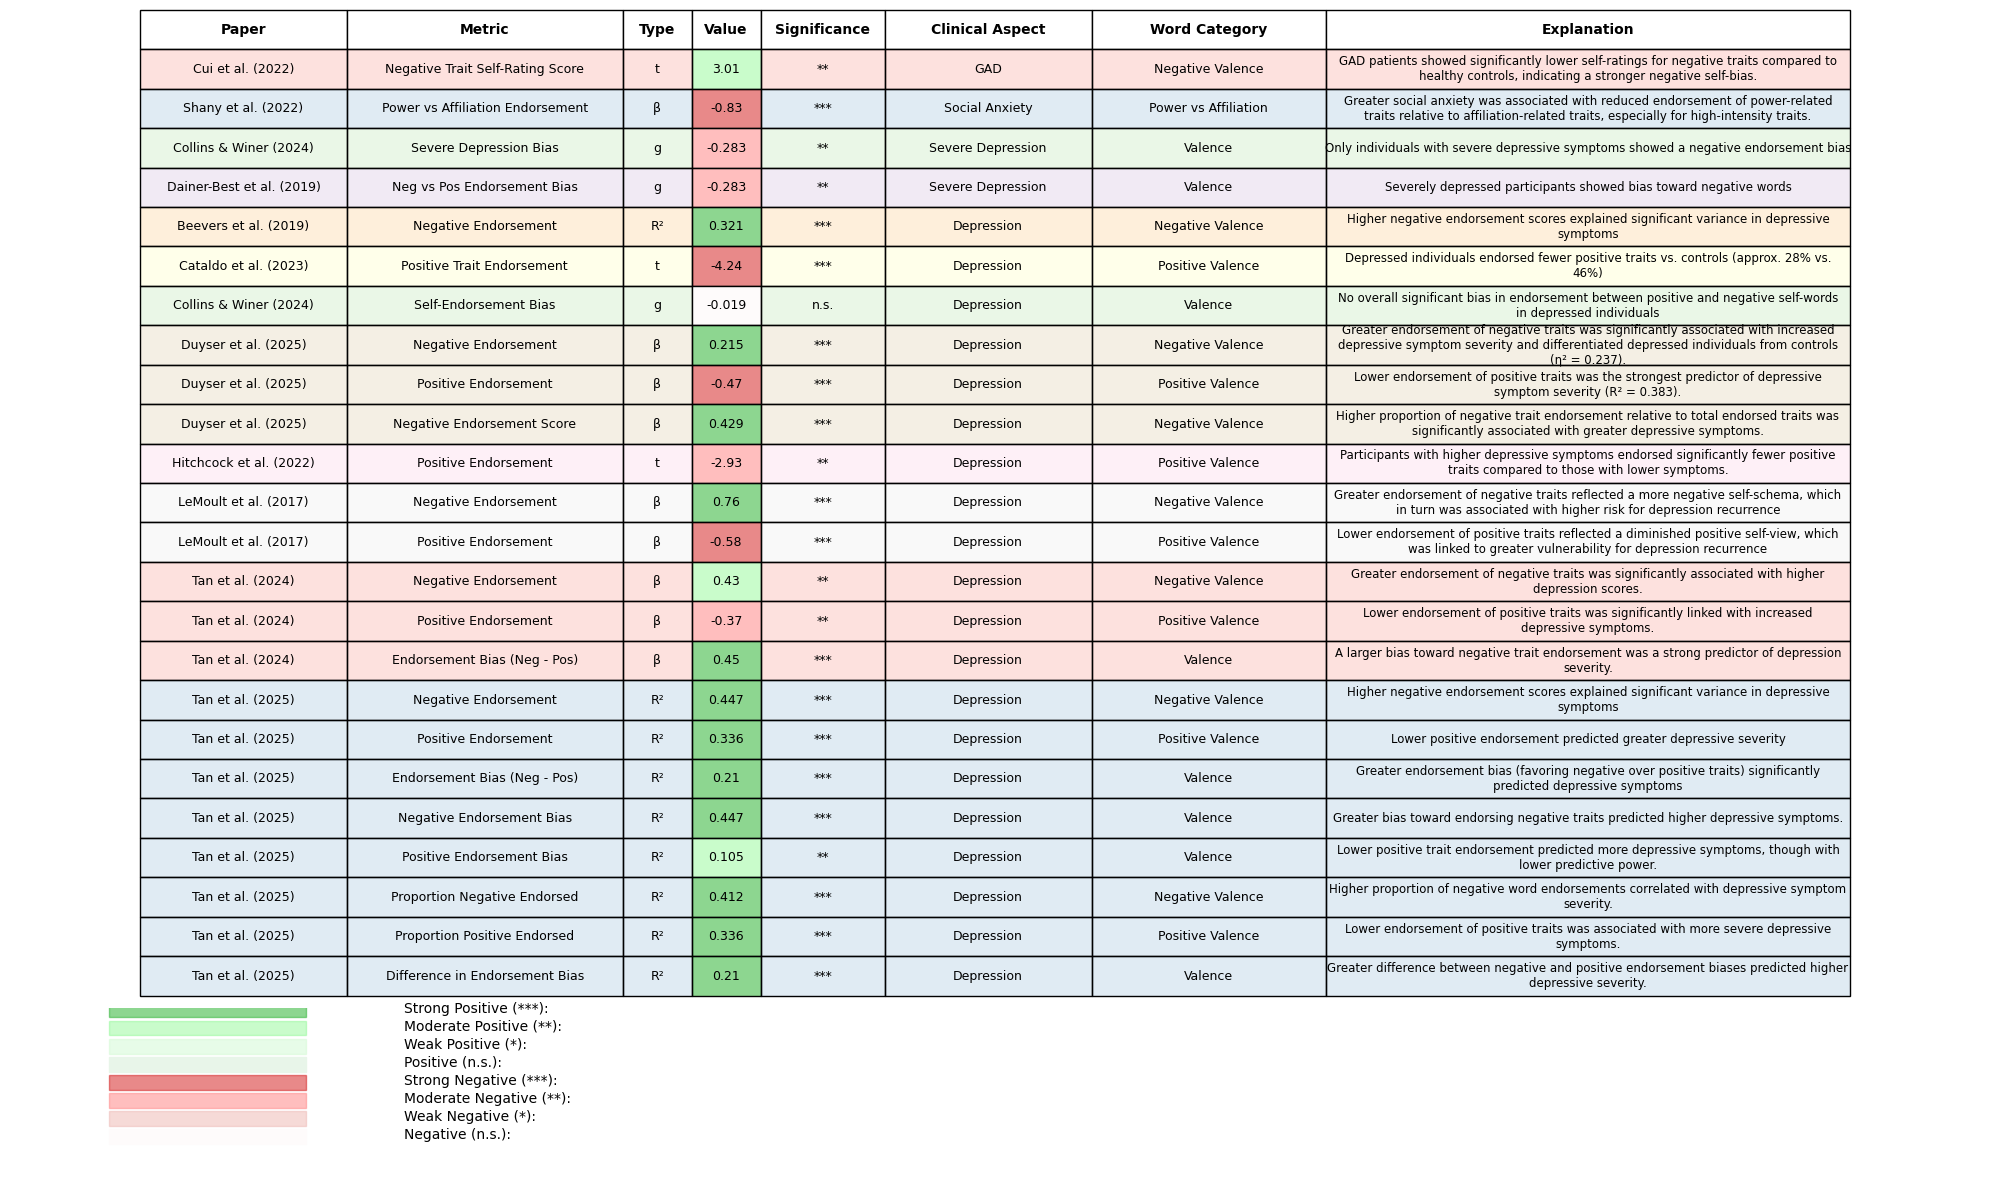

In [28]:
data = [
    {"Paper": "LeMoult et al. (2017)", "Metric": "Negative Endorsement", "Type": "β", "Value": 0.76,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Greater endorsement of negative traits reflected a more negative self-schema, which in turn was associated with higher risk for depression recurrence"},
    
    {"Paper": "LeMoult et al. (2017)", "Metric": "Positive Endorsement", "Type": "β", "Value": -0.58,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
     "Explanation": "Lower endorsement of positive traits reflected a diminished positive self-view, which was linked to greater vulnerability for depression recurrence"},
    
    {"Paper": "Dainer-Best et al. (2019)", "Metric": "Neg vs Pos Endorsement Bias", "Type": "g", "Value": -0.283,
     "Significance": "**", "Clinical Aspect": "Severe Depression", "Word Category": "Valence",
     "Explanation": "Severely depressed participants showed bias toward negative words"},
    
    {"Paper": "Beevers et al. (2019)", "Metric": "Negative Endorsement", "Type": "R²", "Value": 0.321,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Higher negative endorsement scores explained significant variance in depressive symptoms"},
    
    {"Paper": "Tan et al. (2025)", "Metric": "Negative Endorsement", "Type": "R²", "Value": 0.447,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Higher negative endorsement scores explained significant variance in depressive symptoms"},
    
    {"Paper": "Tan et al. (2025)", "Metric": "Positive Endorsement", "Type": "R²", "Value": 0.336,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
     "Explanation": "Lower positive endorsement predicted greater depressive severity"},

    {"Paper": "Tan et al. (2025)", "Metric": "Endorsement Bias (Neg - Pos)", "Type": "R²", "Value": 0.210,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Valence",
     "Explanation": "Greater endorsement bias (favoring negative over positive traits) significantly predicted depressive symptoms"},

    {"Paper": "Collins & Winer (2024)", "Metric": "Self-Endorsement Bias", "Type": "g", "Value": -0.019,
     "Significance": "n.s.", "Clinical Aspect": "Depression", "Word Category": "Valence",
     "Explanation": "No overall significant bias in endorsement between positive and negative self-words in depressed individuals"},

    {"Paper": "Collins & Winer (2024)", "Metric": "Severe Depression Bias", "Type": "g", "Value": -0.283,
     "Significance": "**", "Clinical Aspect": "Severe Depression", "Word Category": "Valence",
     "Explanation": "Only individuals with severe depressive symptoms showed a negative endorsement bias"},

    {"Paper": "Cataldo et al. (2023)", "Metric": "Positive Trait Endorsement", "Type": "t", "Value": -4.24,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
     "Explanation": "Depressed individuals endorsed fewer positive traits vs. controls (approx. 28% vs. 46%)"},

    {"Paper": "Tan et al. (2024)", "Metric": "Negative Endorsement", "Type": "β", "Value": 0.43,
     "Significance": "**", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Greater endorsement of negative traits was significantly associated with higher depression scores."},

    {"Paper": "Tan et al. (2024)", "Metric": "Positive Endorsement", "Type": "β", "Value": -0.37,
     "Significance": "**", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
     "Explanation": "Lower endorsement of positive traits was significantly linked with increased depressive symptoms."},

    {"Paper": "Tan et al. (2024)", "Metric": "Endorsement Bias (Neg - Pos)", "Type": "β", "Value": 0.45,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Valence",
     "Explanation": "A larger bias toward negative trait endorsement was a strong predictor of depression severity."},

    {"Paper": "Tan et al. (2025)", "Metric": "Negative Endorsement Bias", "Type": "R²", "Value": 0.447,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Valence",
     "Explanation": "Greater bias toward endorsing negative traits predicted higher depressive symptoms."},

    {"Paper": "Tan et al. (2025)", "Metric": "Positive Endorsement Bias", "Type": "R²", "Value": 0.105,
     "Significance": "**", "Clinical Aspect": "Depression", "Word Category": "Valence",
     "Explanation": "Lower positive trait endorsement predicted more depressive symptoms, though with lower predictive power."},

    {"Paper": "Tan et al. (2025)", "Metric": "Proportion Negative Endorsed", "Type": "R²", "Value": 0.412,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Higher proportion of negative word endorsements correlated with depressive symptom severity."},

    {"Paper": "Tan et al. (2025)", "Metric": "Proportion Positive Endorsed", "Type": "R²", "Value": 0.336,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
     "Explanation": "Lower endorsement of positive traits was associated with more severe depressive symptoms."},

    {"Paper": "Tan et al. (2025)", "Metric": "Difference in Endorsement Bias", "Type": "R²", "Value": 0.210,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Valence",
     "Explanation": "Greater difference between negative and positive endorsement biases predicted higher depressive severity."},

    {"Paper": "Duyser et al. (2025)", "Metric": "Negative Endorsement", "Type": "β", "Value": 0.215,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Greater endorsement of negative traits was significantly associated with increased depressive symptom severity and differentiated depressed individuals from controls (η² = 0.237)."},

    {"Paper": "Duyser et al. (2025)", "Metric": "Positive Endorsement", "Type": "β", "Value": -0.470,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
     "Explanation": "Lower endorsement of positive traits was the strongest predictor of depressive symptom severity (R² = 0.383)."},

    {"Paper": "Duyser et al. (2025)", "Metric": "Negative Endorsement Score", "Type": "β", "Value": 0.429,
     "Significance": "***", "Clinical Aspect": "Depression", "Word Category": "Negative Valence",
     "Explanation": "Higher proportion of negative trait endorsement relative to total endorsed traits was significantly associated with greater depressive symptoms."},

    {"Paper": "Hitchcock et al. (2022)", "Metric": "Positive Endorsement", "Type": "t", "Value": -2.93,
    "Significance": "**", "Clinical Aspect": "Depression", "Word Category": "Positive Valence",
    "Explanation": "Participants with higher depressive symptoms endorsed significantly fewer positive traits compared to those with lower symptoms."
    },

    {"Paper": "Shany et al. (2022)", "Metric": "Power vs Affiliation Endorsement", "Type": "β", "Value": -0.83,
     "Significance": "***", "Clinical Aspect": "Social Anxiety", "Word Category": "Power vs Affiliation",
     "Explanation": "Greater social anxiety was associated with reduced endorsement of power-related traits relative to affiliation-related traits, especially for high-intensity traits."},

    {"Paper": "Cui et al. (2022)", "Metric": "Negative Trait Self-Rating Score", "Type": "t", "Value": 3.01,
     "Significance": "**", "Clinical Aspect": "GAD", "Word Category": "Negative Valence",
     "Explanation": "GAD patients showed significantly lower self-ratings for negative traits compared to healthy controls, indicating a stronger negative self-bias."}
]


def wrap_text(text, width=75):
    return "\n".join(textwrap.wrap(str(text), width=width))

df = pd.DataFrame(data)
df['Explanation'] = df['Explanation'].apply(lambda x: wrap_text(x, width=85))

# Classify metrics
def classify_metric(metric):
    metric = str(metric)
    if "Negative Endorsement" in metric:
        return "Negative Endorsement"
    elif "Positive Endorsement" in metric:
        return "Positive Endorsement"
    elif "Bias" in metric:
        return "Endorsement Bias"
    elif any(k in metric for k in ["Power", "Low Dominance", "Trait"]):
        return "Trait-Specific"
    else:
        return "Other / Summary"

df['Metric Group'] = df['Metric'].apply(classify_metric)

# Clinical Aspect ordering
aspect_order = {
    "Social Anxiety": 0,
    "GAD": 0,  # Group under Anxiety
    "Severe Depression": 1,
    "Depression": 2
}
df['AspectOrder'] = df['Clinical Aspect'].map(aspect_order).fillna(3)

# Sort first by Aspect, then by Paper
df = df.sort_values(by=['AspectOrder', 'Paper']).reset_index(drop=True)

# Background color assignment per paper
unique_papers = df['Paper'].unique()
base_colors = plt.cm.Pastel1.colors
paper_color_map = {paper: to_rgba(base_colors[i % len(base_colors)], alpha=0.4) for i, paper in enumerate(unique_papers)}

# Column widths and headers
col_widths = [0.15, 0.2, 0.05, 0.05, 0.09, 0.15, 0.17, 0.38]
columns = ['Paper', 'Metric', 'Type', 'Value', 'Significance', 'Clinical Aspect', 'Word Category', 'Explanation']
cell_text = df[columns].values.tolist()

# Color for significance
def get_color(val, sig):
    try:
        if val > 0:
            if sig == "***": return "#31B5378D"
            elif sig == "**": return "#7FF8856B"
            elif sig == "*": return "#D4FAD58A"
            else: return "#E8F5E9"
        elif val < 0:
            if sig == "***": return "#D110107E"
            elif sig == "**": return "#FF8C8C90"
            elif sig == "*": return "#EEB9B486"
            else: return "#FEFBFB"
    except:
        pass
    return "white"

# == Plot ==
fig, (ax_table, ax_legend) = plt.subplots(2, 1, figsize=(20, 12), gridspec_kw={'height_ratios': [4, 1]})
ax_table.axis('off')
ax_legend.axis('off')

# Table construction
table = tbl.table(ax_table, cellText=[columns] + cell_text, loc='center',
                  cellLoc='center', colWidths=col_widths)
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(0.7, 2.2)

# Apply styles
for (row, col), cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')
    if row == 0:
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
    elif col == 7:
        cell.set_fontsize(8.5)
    else:
        cell.set_fontsize(9)

    if row > 0:
        paper = df.iloc[row - 1]['Paper']
        base_color = paper_color_map[paper]
        cell.set_facecolor(base_color)

        if col == 3:  # Value column
            val = df.iloc[row - 1]['Value']
            sig = df.iloc[row - 1]['Significance']
            overlay = get_color(val, sig)
            if overlay != "white":
                cell.set_facecolor(overlay)

# Legend
legend_data = [
    ("Strong Positive (***):", "#31B5378D"),
    ("Moderate Positive (**):", "#7FF8856B"),
    ("Weak Positive (*):", "#D4FAD58A"),
    ("Positive (n.s.):", "#E8F5E9"),
    ("Strong Negative (***):", "#D110107E"),
    ("Moderate Negative (**):", "#FF8C8C90"),
    ("Weak Negative (*):", "#EEB9B486"),
    ("Negative (n.s.):", "#FEFBFB"),
]

for i, (label, color) in enumerate(legend_data):
    y_pos = 1 - i * 0.1
    ax_legend.add_patch(plt.Rectangle((0.05, y_pos - 0.05), 0.1, 0.08, color=color, transform=ax_legend.transAxes))
    ax_legend.text(0.2, y_pos, label, transform=ax_legend.transAxes,
                   fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# Drift Rates

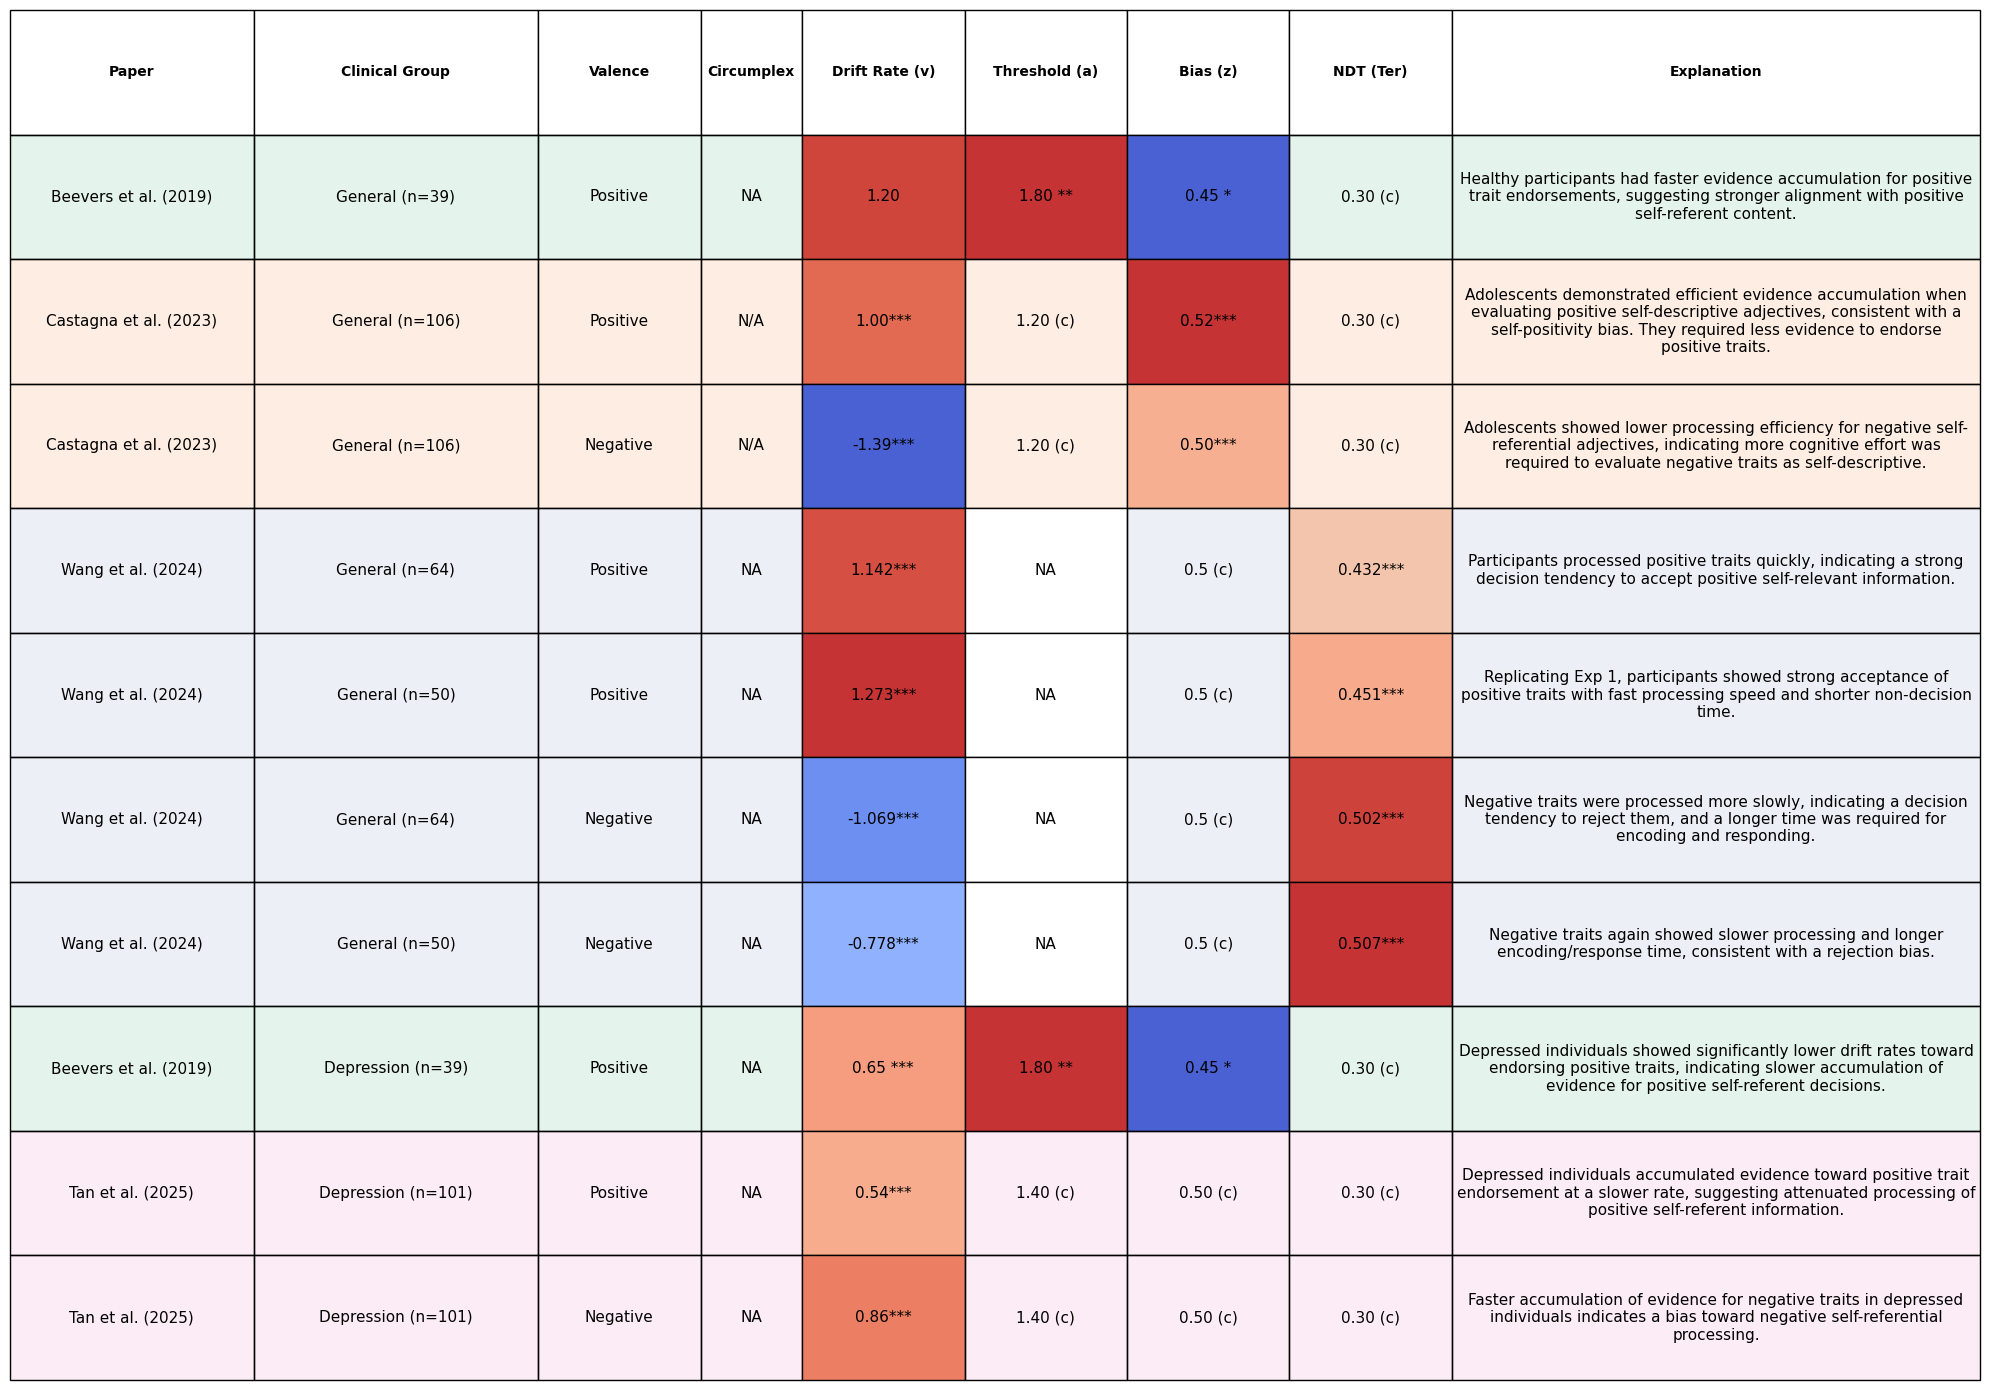

In [34]:
data = [
    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (n=64)",
        "Valence": "Positive",
        "Circumplex": "NA",
        "Drift Rate (v)": "1.142***",
        "Threshold (a)": "NA",
        "Bias (z)": "0.5 (c)",
        "NDT (Ter)": "0.432***",
        "Explanation": "Participants processed positive traits quickly, indicating a strong decision tendency to accept positive self-relevant information."
    },

    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (n=64)",
        "Valence": "Negative",
        "Circumplex": "NA",
        "Drift Rate (v)": "-1.069***",
        "Threshold (a)": "NA",
        "Bias (z)": "0.5 (c)",
        "NDT (Ter)": "0.502***",
        "Explanation": "Negative traits were processed more slowly, indicating a decision tendency to reject them, and a longer time was required for encoding and responding."
    },

    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (n=50)",
        "Valence": "Positive",
        "Circumplex": "NA",
        "Drift Rate (v)": "1.273***",
        "Threshold (a)": "NA",
        "Bias (z)": "0.5 (c)",
        "NDT (Ter)": "0.451***",
        "Explanation": "Replicating Exp 1, participants showed strong acceptance of positive traits with fast processing speed and shorter non-decision time."
    },

    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (n=50)",
        "Valence": "Negative",
        "Circumplex": "NA",
        "Drift Rate (v)": "-0.778***",
        "Threshold (a)": "NA",
        "Bias (z)": "0.5 (c)",
        "NDT (Ter)": "0.507***",
        "Explanation": "Negative traits again showed slower processing and longer encoding/response time, consistent with a rejection bias."
    },

    {
        "Paper": "Beevers et al. (2019)",
        "Clinical Group": "Depression (n=39)",
        "Valence": "Positive",
        "Circumplex": "NA",
        "Drift Rate (v)": "0.65 ***",
        "Threshold (a)": "1.80 **",
        "Bias (z)": "0.45 *",
        "NDT (Ter)": "0.30 (c)",
        "Explanation": "Depressed individuals showed significantly lower drift rates toward endorsing positive traits, indicating slower accumulation of evidence for positive self-referent decisions."
    },

    {
        "Paper": "Beevers et al. (2019)",
        "Clinical Group": "General (n=39)",
        "Valence": "Positive",
        "Circumplex": "NA",
        "Drift Rate (v)": "1.20",
        "Threshold (a)": "1.80 **",
        "Bias (z)": "0.45 *",
        "NDT (Ter)": "0.30 (c)",
        "Explanation": "Healthy participants had faster evidence accumulation for positive trait endorsements, suggesting stronger alignment with positive self-referent content."
    },

    {
        "Paper": "Tan et al. (2025)",
        "Clinical Group": "Depression (n=101)",
        "Valence": "Positive",
        "Circumplex": "NA",
        "Drift Rate (v)": "0.54***",
        "Threshold (a)": "1.40 (c)",
        "Bias (z)": "0.50 (c)",
        "NDT (Ter)": "0.30 (c)",
        "Explanation": "Depressed individuals accumulated evidence toward positive trait endorsement at a slower rate, suggesting attenuated processing of positive self-referent information."
    },

    {
        "Paper": "Tan et al. (2025)",
        "Clinical Group": "Depression (n=101)",
        "Valence": "Negative",
        "Circumplex": "NA",
        "Drift Rate (v)": "0.86***",
        "Threshold (a)": "1.40 (c)",
        "Bias (z)": "0.50 (c)",
        "NDT (Ter)": "0.30 (c)",
        "Explanation": "Faster accumulation of evidence for negative traits in depressed individuals indicates a bias toward negative self-referential processing."
    },

    {
        "Paper": "Castagna et al. (2023)",
        "Clinical Group": "General (n=106)",
        "Valence": "Positive",
        "Circumplex": "N/A",
        "Drift Rate (v)": "1.00***",
        "Threshold (a)": "1.20 (c)", 
        "Bias (z)": "0.52***",
        "NDT (Ter)": "0.30 (c)", 
        "Explanation": "Adolescents demonstrated efficient evidence accumulation when evaluating positive self-descriptive adjectives, consistent with a self-positivity bias. They required less evidence to endorse positive traits."
    },
    {
        "Paper": "Castagna et al. (2023)",
        "Clinical Group": "General (n=106)",
        "Valence": "Negative",
        "Circumplex": "N/A",
        "Drift Rate (v)": "-1.39***",
        "Threshold (a)": "1.20 (c)", 
        "Bias (z)": "0.50***",
        "NDT (Ter)": "0.30 (c)", 
        "Explanation": "Adolescents showed lower processing efficiency for negative self-referential adjectives, indicating more cognitive effort was required to evaluate negative traits as self-descriptive."
    },   
]
    

df = pd.DataFrame(data)

# Ordering
def classify_group(name):
    name = name.lower()
    if "depression" in name:
        return 1
    return 0

df['GroupOrder'] = df['Clinical Group'].apply(classify_group)
df['ValenceOrder'] = df['Valence'].map({'Positive': 0, 'Negative': 1})
df = df.sort_values(by=["GroupOrder", "Paper", "ValenceOrder"]).reset_index(drop=True)

# Float parsing
def extract_float(s):
    try:
        return float(s.split()[0].replace('(', '').replace(')', '').replace('*', ''))
    except:
        return np.nan

df['Drift Rate (v)_val'] = df['Drift Rate (v)'].apply(extract_float)
df['Threshold (a)_val'] = df['Threshold (a)'].apply(extract_float)
df['Bias (z)_val'] = df['Bias (z)'].apply(extract_float)
df['NDT (Ter)_val'] = df['NDT (Ter)'].apply(extract_float)

# Normalization
def normalize_series(series):
    return (series - series.min()) / (series.max() - series.min())

norm_drift = normalize_series(df['Drift Rate (v)_val'])
norm_thresh = normalize_series(df['Threshold (a)_val'])
norm_bias = normalize_series(df['Bias (z)_val'])
norm_ndt = normalize_series(df['NDT (Ter)_val'])

# Color mapping
cmap = plt.cm.coolwarm
def get_color(val):
    if np.isnan(val): return 'white'
    return mcolors.to_hex(cmap(val * 0.9 + 0.05))

# Wrap explanation
def wrap_text(text, width): return "\n".join(textwrap.wrap(str(text), width=width))
df['Explanation'] = df['Explanation'].apply(lambda x: wrap_text(x, 67))

# Paper color mapping
unique_papers = df['Paper'].unique()
base_colors = plt.cm.Pastel2.colors
paper_color_map = {paper: mcolors.to_rgba(base_colors[i % len(base_colors)], alpha=0.35) for i, paper in enumerate(unique_papers)}

# Build table
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
columns = ["Paper", "Clinical Group", "Valence", "Circumplex", "Drift Rate (v)", 
           "Threshold (a)", "Bias (z)", "NDT (Ter)", "Explanation"]
cell_text = [columns] + df[columns].values.tolist()

table = tbl.Table(ax, bbox=[0, 0, 1, 1])
nrows, ncols = len(cell_text), len(columns)
row_height = 1.5 / nrows
col_widths = [0.12, 0.14, 0.08, 0.05, 0.08, 0.08, 0.08, 0.08, 0.26]

# Add cells
for i, row in enumerate(cell_text):
    for j, val in enumerate(row):
        base_color = 'white'
        if i > 0:
            paper = df.iloc[i - 1]['Paper']
            base_color = paper_color_map[paper]
            raw_val = str(df.iloc[i - 1, j])
            if j == 4 and '(c)' not in raw_val: base_color = get_color(norm_drift.iloc[i-1])
            elif j == 5 and '(c)' not in raw_val: base_color = get_color(norm_thresh.iloc[i-1])
            elif j == 6 and '(c)' not in raw_val: base_color = get_color(norm_bias.iloc[i-1])
            elif j == 7 and '(c)' not in raw_val: base_color = get_color(norm_ndt.iloc[i-1])
        table.add_cell(i, j, width=col_widths[j], height=row_height,
                       text=str(val), loc='center', facecolor=base_color)

# Style
table.auto_set_font_size(False)
for (row, col), cell in table.get_celld().items():
    text = cell.get_text()
    if row == 0:
        text.set_fontsize(10)
        text.set_weight('bold')
    elif col == 8:
        text.set_fontsize(11)
        text.set_ha('center')
    else:
        text.set_fontsize(11)

ax.add_table(table)
plt.tight_layout()
plt.show()

# Regression

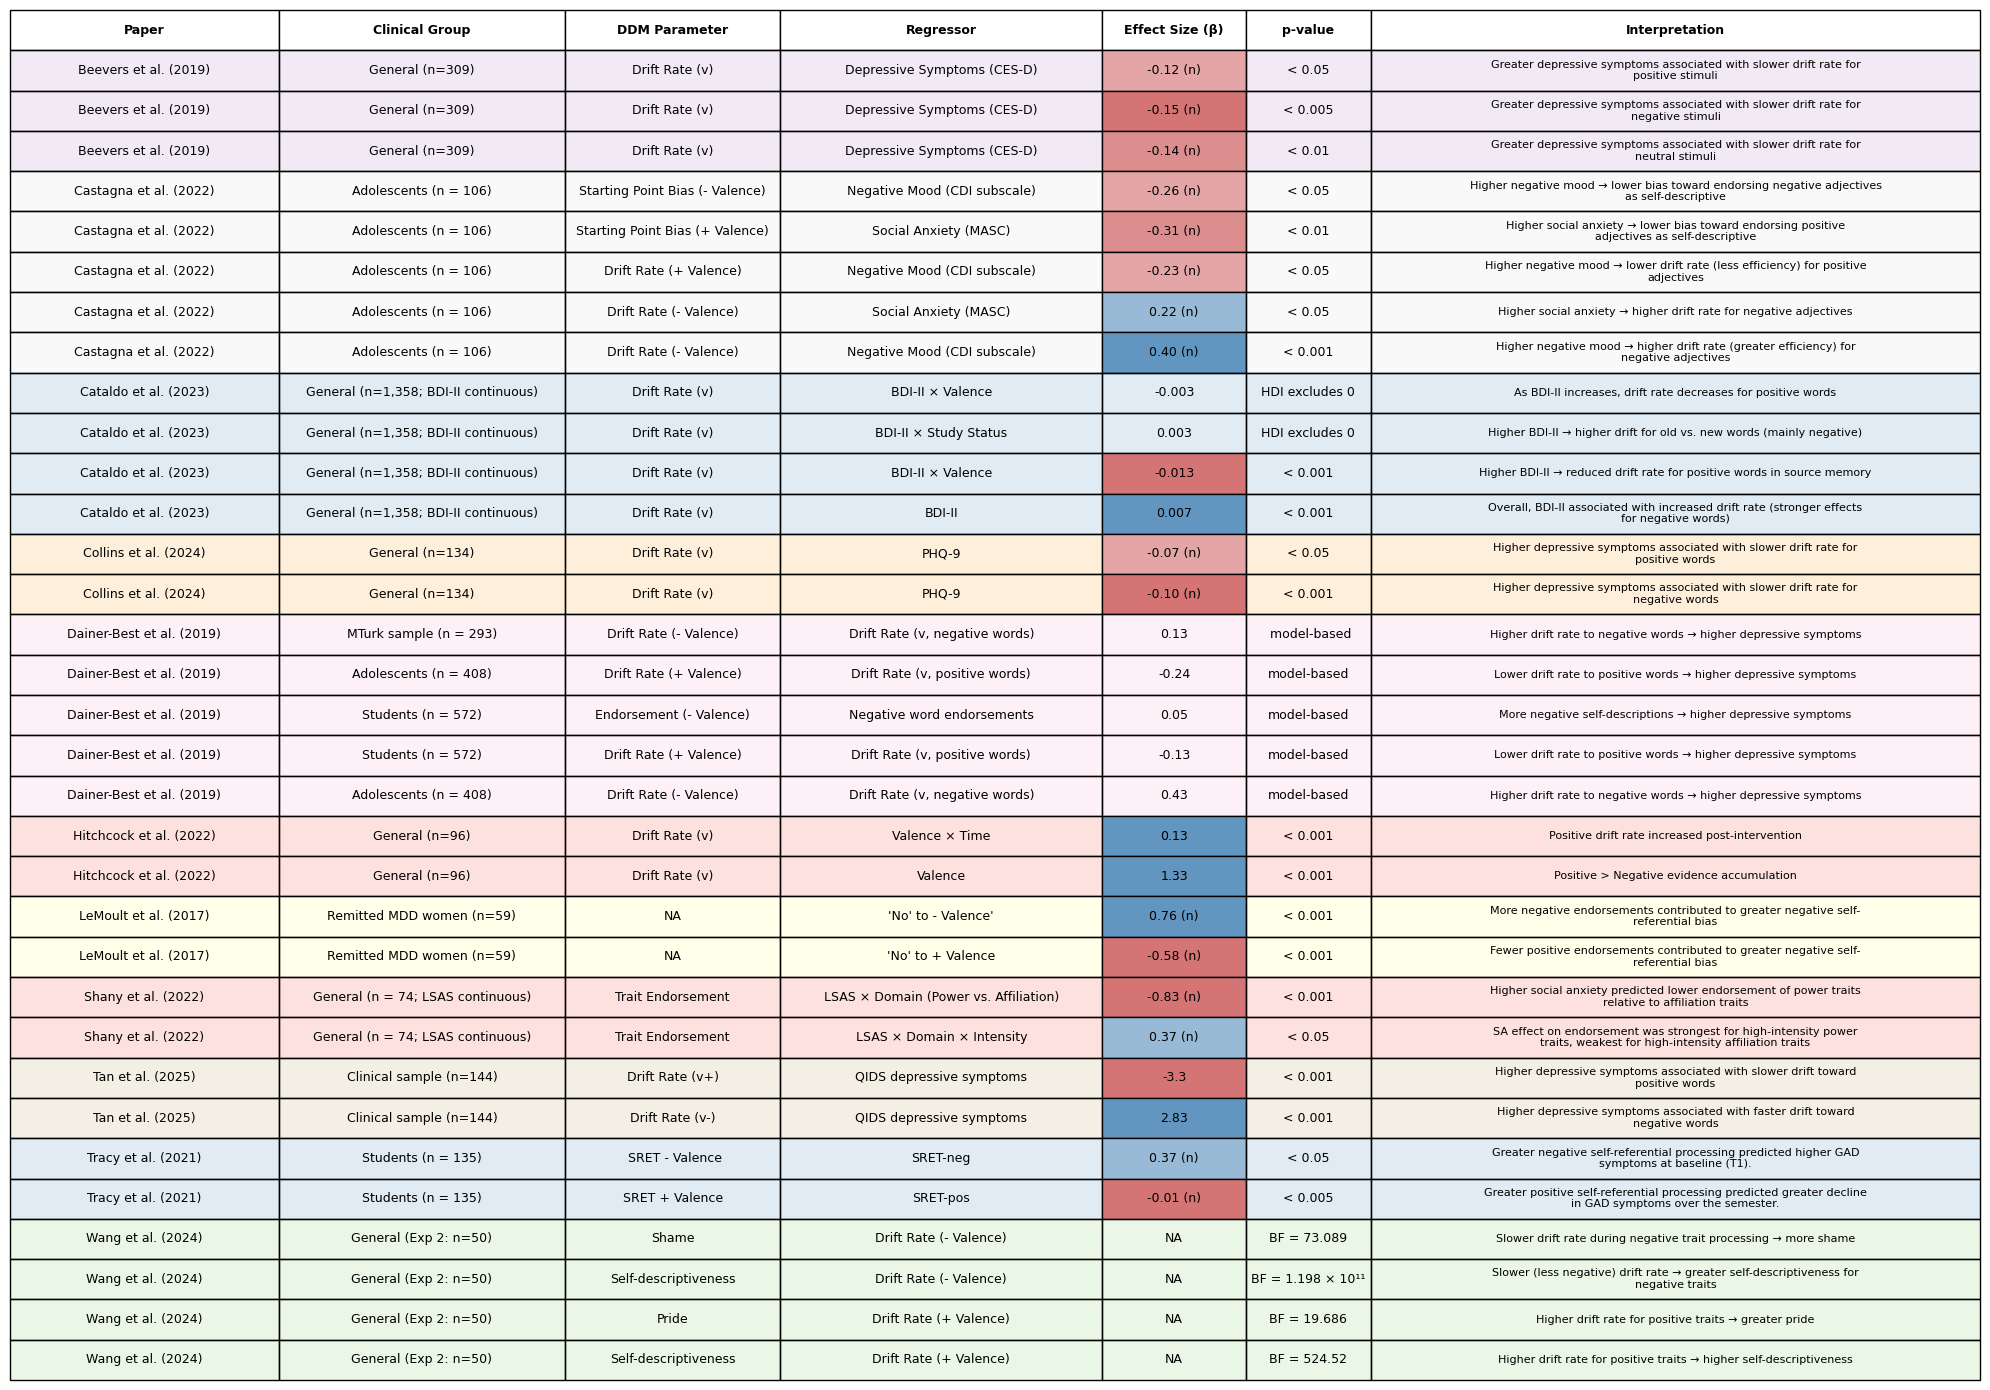

In [38]:

data = [
    {
        "Paper": "Hitchcock et al. (2022)",
        "Clinical Group": "General (n=96)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "Valence",
        "Effect Size (β)": 1.33,
        "Normalized?": "No",
        "SD" : "SD_X =  , SD_Y",
        "Model Fit": "NA",
        "p-value": "< 0.001",
        "Interpretation": "Positive > Negative evidence accumulation",
        "Direction": "Predictor → Drift rate"
    },
    {
        "Paper": "Hitchcock et al. (2022)",
        "Clinical Group": "General (n=96)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "Valence × Time",
        "Effect Size (β)": 0.13,
        "Normalized?": "No",
        "Model Fit": "NA",
        "p-value": "< 0.001",
        "Interpretation": "Positive drift rate increased post-intervention",
        "Direction": "Predictor → Drift rate"
    },
    {
        "Paper": "Cataldo et al. (2023)",
        "Clinical Group": "General (n=1,358; BDI-II continuous)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "BDI-II × Valence",
        "Effect Size (β)": -0.003,
        "Normalized?": "No",
        "Model Fit": "NA",
        "p-value": "HDI excludes 0",
        "Interpretation": "As BDI-II increases, drift rate decreases for positive words",
        "Direction": "BDI-II × Valence → Drift rate (recognition)"
    },
    {
        "Paper": "Cataldo et al. (2023)",
        "Clinical Group": "General (n=1,358; BDI-II continuous)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "BDI-II × Study Status",
        "Effect Size (β)": 0.003,
        "Normalized?": "No",
        "Model Fit": "NA",
        "p-value": "HDI excludes 0",
        "Interpretation": "Higher BDI-II → higher drift for old vs. new words (mainly negative)",
        "Direction": "BDI-II × Study → Drift rate (recognition)"
    },

    {
        "Paper": "Cataldo et al. (2023)",
        "Clinical Group": "General (n=1,358; BDI-II continuous)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "BDI-II × Valence",
        "Effect Size (β)": -0.013,
        "Normalized?": "No",
        "Model Fit": "NA",
        "p-value": "< 0.001",
        "Interpretation": "Higher BDI-II → reduced drift rate for positive words in source memory",
        "Direction": "BDI-II × Valence → Drift rate (source)"
    },
    {
        "Paper": "Cataldo et al. (2023)",
        "Clinical Group": "General (n=1,358; BDI-II continuous)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "BDI-II",
        "Effect Size (β)": 0.007,
        "Normalized?": "No",
        "Model Fit": "NA",
        "p-value": "< 0.001",
        "Interpretation": "Overall, BDI-II associated with increased drift rate (stronger effects for negative words)",
        "Direction": "BDI-II → Drift rate (source)"
    },
    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (Exp 2: n=50)",
        "DDM Parameter": "Self-descriptiveness",
        "Regressor": "Drift Rate (+ Valence)",
        "Effect Size (β)": "NA",
        "Normalized?": "No",
        "Model Fit": "R² = 0.301",
        "p-value": "BF = 524.52",
        "Interpretation": "Higher drift rate for positive traits → higher self-descriptiveness",
        "Direction": "Drift rate → Self-descriptiveness (positive)"
    },
    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (Exp 2: n=50)",
        "DDM Parameter": "Pride",
        "Regressor": "Drift Rate (+ Valence)",
        "Effect Size (β)": "NA",
        "Normalized?": "No",
        "Model Fit": "R² = 0.186",
        "p-value": "BF = 19.686",
        "Interpretation": "Higher drift rate for positive traits → greater pride",
        "Direction": "Drift rate → Pride (positive)"
    },
    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (Exp 2: n=50)",
        "DDM Parameter": "Self-descriptiveness",
        "Regressor": "Drift Rate (- Valence)",
        "Effect Size (β)": "NA",
        "Normalized?": "No",
        "Model Fit": "R² = 0.701",
        "p-value": "BF = 1.198 × 10¹¹",
        "Interpretation": "Slower (less negative) drift rate → greater self-descriptiveness for negative traits",
        "Direction": "Drift rate → Self-descriptiveness (negative)"
    },
    {
        "Paper": "Wang et al. (2024)",
        "Clinical Group": "General (Exp 2: n=50)",
        "DDM Parameter": "Shame",
        "Regressor": "Drift Rate (- Valence)",
        "Effect Size (β)": "NA",
        "Normalized?": "No",
        "Model Fit": "R² = 0.235",
        "p-value": "BF = 73.089",
        "Interpretation": "Slower drift rate during negative trait processing → more shame",
        "Direction": "Drift rate → Shame (negative)"
    },
    {
        "Paper": "Beevers et al. (2019)",
        "Clinical Group": "General (n=309)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "Depressive Symptoms (CES-D)",
        "Effect Size (β)": "-0.12 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.014",
        "p-value": "< 0.05",
        "Interpretation": "Greater depressive symptoms associated with slower drift rate for positive stimuli",
        "Direction": "Depression → Drift rate (positive)"
    },
    {
        "Paper": "Beevers et al. (2019)",
        "Clinical Group": "General (n=309)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "Depressive Symptoms (CES-D)",
        "Effect Size (β)": "-0.15 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.022",
        "p-value": "< 0.005",
        "Interpretation": "Greater depressive symptoms associated with slower drift rate for negative stimuli",
        "Direction": "Depression → Drift rate (negative)"
    },
    {
        "Paper": "Beevers et al. (2019)",
        "Clinical Group": "General (n=309)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "Depressive Symptoms (CES-D)",
        "Effect Size (β)": "-0.14 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.018",
        "p-value": "< 0.01",
        "Interpretation": "Greater depressive symptoms associated with slower drift rate for neutral stimuli",
        "Direction": "Depression → Drift rate (neutral)"
    },
    {
        "Paper": "Collins et al. (2024)",
        "Clinical Group": "General (n=134)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "PHQ-9",
        "Effect Size (β)": "-0.07 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.05",
        "p-value": "< 0.05",
        "Interpretation": "Higher depressive symptoms associated with slower drift rate for positive words",
        "Direction": "PHQ-9 → Drift rate (positive)"
    },
    {
        "Paper": "Collins et al. (2024)",
        "Clinical Group": "General (n=134)",
        "DDM Parameter": "Drift Rate (v)",
        "Regressor": "PHQ-9",
        "Effect Size (β)": "-0.10 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.09",
        "p-value": "< 0.001",
        "Interpretation": "Higher depressive symptoms associated with slower drift rate for negative words",
        "Direction": "PHQ-9 → Drift rate (negative)"
    },
    {
        "Paper": "LeMoult et al. (2017)",
        "Clinical Group": "Remitted MDD women (n=59)",
        "DDM Parameter": "NA",
        "Regressor": "'No' to + Valence",
        "Effect Size (β)": "-0.58 (n)",
        "Normalized?": "Yes",
        "Model Fit": "NA",
        "p-value": "< 0.001",
        "Interpretation": "Fewer positive endorsements contributed to greater negative self-referential bias",
        "Direction": "Predictor → Latent SRET"
    },
    {
        "Paper": "LeMoult et al. (2017)",
        "Clinical Group": "Remitted MDD women (n=59)",
        "DDM Parameter": "NA",
        "Regressor": "'No' to - Valence'",
        "Effect Size (β)": "0.76 (n)",
        "Normalized?": "Yes",
        "Model Fit": "NA",
        "p-value": "< 0.001",
        "Interpretation": "More negative endorsements contributed to greater negative self-referential bias",
        "Direction": "Predictor → Latent SRET"
    },
    {
        "Paper": "Tan et al. (2025)",
        "Clinical Group": "Clinical sample (n=144)",
        "DDM Parameter": "Drift Rate (v+)",
        "Regressor": "QIDS depressive symptoms",
        "Effect Size (β)": -3.30,
        "Normalized?": "No",
        "Model Fit": "R² = 0.267, MSE = 27.32",
        "p-value": "< 0.001",
        "Interpretation": "Higher depressive symptoms associated with slower drift toward positive words",
        "Direction": "Depressive symptoms → Drift rate (positive)"
    },
    {
        "Paper": "Tan et al. (2025)",
        "Clinical Group": "Clinical sample (n=144)",
        "DDM Parameter": "Drift Rate (v-)",
        "Regressor": "QIDS depressive symptoms",
        "Effect Size (β)": 2.83,
        "Normalized?": "No",
        "Model Fit": "R² = 0.230, MSE = 28.72",
        "p-value": "< 0.001",
        "Interpretation": "Higher depressive symptoms associated with faster drift toward negative words",
        "Direction": "Depressive symptoms → Drift rate (negative)"
    },
    {
        "Paper": "Dainer-Best et al. (2019)",
        "Clinical Group": "Students (n = 572)",
        "DDM Parameter": "Drift Rate (+ Valence)",
        "Regressor": "Drift Rate (v, positive words)",
        "Effect Size (β)": -0.13,
        "Normalized?": "No",
        "Model Fit": "RD² = 0.44, 95% CI [0.42, 0.46]",
        "p-value": "model-based",
        "Interpretation": "Lower drift rate to positive words → higher depressive symptoms",
        "Direction": "Drift rate (positive) → Depression severity"
    },
    {
        "Paper": "Dainer-Best et al. (2019)",
        "Clinical Group": "Students (n = 572)",
        "DDM Parameter": "Endorsement (- Valence)",
        "Regressor": "Negative word endorsements",
        "Effect Size (β)": 0.05,
        "Normalized?": "No",
        "Model Fit": "RD² = 0.44, 95% CI [0.42, 0.46]",
        "p-value": "model-based",
        "Interpretation": "More negative self-descriptions → higher depressive symptoms",
        "Direction": "Negative endorsement → Depression severity"
    },
    {
        "Paper": "Dainer-Best et al. (2019)",
        "Clinical Group": "MTurk sample (n = 293)",
        "DDM Parameter": "Drift Rate (- Valence)",
        "Regressor": "Drift Rate (v, negative words)",
        "Effect Size (β)": 0.13,
        "Normalized?": "No",
        "Model Fit": "RD² = 0.41, 95% CI [0.40, 0.43]",
        "p-value": " model-based",
        "Interpretation": "Higher drift rate to negative words → higher depressive symptoms",
        "Direction": "Drift rate (negative) → Depression severity"
    },
    {
        "Paper": "Dainer-Best et al. (2019)",
        "Clinical Group": "Adolescents (n = 408)",
        "DDM Parameter": "Drift Rate (+ Valence)",
        "Regressor": "Drift Rate (v, positive words)",
        "Effect Size (β)": -0.24,
        "Normalized?": "No",
        "Model Fit": "RD² = 0.40, 95% CI [0.36, 0.43]",
        "p-value": "model-based",
        "Interpretation": "Lower drift rate to positive words → higher depressive symptoms",
        "Direction": "Drift rate (positive) → Depression severity"
    },
    {
        "Paper": "Dainer-Best et al. (2019)",
        "Clinical Group": "Adolescents (n = 408)",
        "DDM Parameter": "Drift Rate (- Valence)",
        "Regressor": "Drift Rate (v, negative words)",
        "Effect Size (β)": 0.43,
        "Normalized?": "No",
        "Model Fit": "RD² = 0.40, 95% CI [0.36, 0.43]",
        "p-value": "model-based",
        "Interpretation": "Higher drift rate to negative words → higher depressive symptoms",
        "Direction": "Drift rate (negative) → Depression severity"
    },
    {
        "Paper": "Castagna et al. (2022)",
        "Clinical Group": "Adolescents (n = 106)",
        "DDM Parameter": "Drift Rate (- Valence)",
        "Regressor": "Negative Mood (CDI subscale)",
        "Effect Size (β)": "0.40 (n)",
        "Normalized?": "Yes (z-scored)",
        "Model Fit": "R² = 0.29",
        "p-value": "< 0.001",
        "Interpretation": "Higher negative mood → higher drift rate (greater efficiency) for negative adjectives",
        "Direction": "Negative Mood → Drift rate (negative)"
    },
    {
        "Paper": "Castagna et al. (2022)",
        "Clinical Group": "Adolescents (n = 106)",
        "DDM Parameter": "Drift Rate (- Valence)",
        "Regressor": "Social Anxiety (MASC)",
        "Effect Size (β)": "0.22 (n)",
        "Normalized?": "Yes (z-scored)",
        "Model Fit": "R² = 0.29",
        "p-value": "< 0.05",
        "Interpretation": "Higher social anxiety → higher drift rate for negative adjectives",
        "Direction": "Social Anxiety → Drift rate (negative)"
    },
    {
        "Paper": "Castagna et al. (2022)",
        "Clinical Group": "Adolescents (n = 106)",
        "DDM Parameter": "Drift Rate (+ Valence)",
        "Regressor": "Negative Mood (CDI subscale)",
        "Effect Size (β)": "-0.23 (n)",
        "Normalized?": "Yes (z-scored)",
        "Model Fit": "R² = 0.11",
        "p-value": "< 0.05",
        "Interpretation": "Higher negative mood → lower drift rate (less efficiency) for positive adjectives",
        "Direction": "Negative Mood → Drift rate (positive)"
    },
    {
        "Paper": "Castagna et al. (2022)",
        "Clinical Group": "Adolescents (n = 106)",
        "DDM Parameter": "Starting Point Bias (+ Valence)",
        "Regressor": "Social Anxiety (MASC)",
        "Effect Size (β)": "-0.31 (n)",
        "Normalized?": "Yes (z-scored)",
        "Model Fit": "R² = 0.10",
        "p-value": "< 0.01",
        "Interpretation": "Higher social anxiety → lower bias toward endorsing positive adjectives as self-descriptive",
        "Direction": "Social Anxiety → Bias (positive)"
    },
    {
        "Paper": "Castagna et al. (2022)",
        "Clinical Group": "Adolescents (n = 106)",
        "DDM Parameter": "Starting Point Bias (- Valence)",
        "Regressor": "Negative Mood (CDI subscale)",
        "Effect Size (β)": "-0.26 (n)",
        "Normalized?": "Yes (z-scored)",
        "Model Fit": "R² = 0.06",
        "p-value": "< 0.05",
        "Interpretation": "Higher negative mood → lower bias toward endorsing negative adjectives as self-descriptive",
        "Direction": "Negative Mood → Bias (negative)"
    },
    {
        "Paper": "Shany et al. (2022)",
        "Clinical Group": "General (n = 74; LSAS continuous)",
        "DDM Parameter": "Trait Endorsement",
        "Regressor": "LSAS × Domain (Power vs. Affiliation)",
        "Effect Size (β)": "-0.83 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.45, F(7,288) = 33.39",
        "p-value": "< 0.001",
        "Interpretation": "Higher social anxiety predicted lower endorsement of power traits relative to affiliation traits",
        "Direction": "SA × Domain → Endorsement (SRET)"
    },
    {
        "Paper": "Shany et al. (2022)",
        "Clinical Group": "General (n = 74; LSAS continuous)",
        "DDM Parameter": "Trait Endorsement",
        "Regressor": "LSAS × Domain × Intensity",
        "Effect Size (β)": "0.37 (n)",
        "Normalized?": "Yes",
        "Model Fit": "R² = 0.45, F(7,288) = 33.39",
        "p-value": "< 0.05",
        "Interpretation": "SA effect on endorsement was strongest for high-intensity power traits, weakest for high-intensity affiliation traits",
        "Direction": "SA × Domain × Intensity → Endorsement (SRET)"
    },
    {
        "Paper": "Tracy et al. (2021)",
        "Clinical Group": "Students (n = 135)",
        "DDM Parameter": " SRET - Valence",
        "Regressor": "SRET-neg",
        "Effect Size (β)": "0.37 (n)",
        "Normalized?": "Yes",
        "Model Fit": "pseudo-R² = .0331",
        "p-value": "< 0.05",
        "Interpretation": "Greater negative self-referential processing predicted higher GAD symptoms at baseline (T1).",
        "Direction": "SRET-neg → GAD (baseline)"
    },
    {
        "Paper": "Tracy et al. (2021)",
        "Clinical Group": "Students (n = 135)",
        "DDM Parameter": "SRET + Valence",
        "Regressor": "SRET-pos",
        "Effect Size (β)": "-0.01 (n)",
        "Normalized?": "Yes",
        "Model Fit": "pseudo-R² = .088",
        "p-value": "< 0.005",
        "Interpretation": "Greater positive self-referential processing predicted greater decline in GAD symptoms over the semester.",
        "Direction": "SRET-pos → GAD (change over time)"
    }
]
# Assume your data is already in 'data'
df = pd.DataFrame(data)

def wrap_text(text, width=100):
    return "\n".join(textwrap.wrap(str(text), width=width))

df['Interpretation'] = df['Interpretation'].apply(lambda x: wrap_text(x, 70))

# Extract effect size value
def extract_effect_val(beta):
    if isinstance(beta, (int, float)):
        return float(beta)
    match = re.search(r"-?\d+\.?\d*", str(beta))
    return float(match.group()) if match else None

df['Effect Size (β)_val'] = df['Effect Size (β)'].apply(extract_effect_val)

# Assign color tiers
def classify_certainty(pval):
    pval = str(pval).lower()
    try:
        if "<" in pval:
            val = float(re.findall(r"[\d.]+", pval)[0])
            if val < 0.001: return "Very Strong"
            elif val < 0.01: return "Strong"
            elif val < 0.05: return "Moderate"
            else: return "Weak"
    except:
        pass
    return "Ignore"

df['Significance Tier'] = df['p-value'].apply(classify_certainty)

# Set pastel colors per paper
unique_papers = df['Paper'].unique()
pastel_palette = plt.cm.Pastel1.colors
paper_color_map = {paper: to_rgba(pastel_palette[i % len(pastel_palette)], alpha=0.4)
                   for i, paper in enumerate(unique_papers)}

# Set cell color from effect size
def get_effect_color(effect, tier):
    if effect is None or tier == "Ignore":
        return 'white'
    base_color = np.array(mcolors.to_rgb("#4682B4")) if effect > 0 else np.array(mcolors.to_rgb("#CD5C5C"))
    scale = {
        "Very Strong": 1.0,
        "Strong": 0.85,
        "Moderate": 0.7,
        "Weak": 0.55
    }.get(tier, 0.3)
    adjusted_color = tuple(scale * base_color + (1 - scale))
    return mcolors.to_hex(adjusted_color)

# Sort only by paper
df = df.sort_values(by=['Paper']).reset_index(drop=True)

# Prepare table
selected_columns = [
    "Paper", "Clinical Group", "DDM Parameter", "Regressor",
    "Effect Size (β)", "p-value", "Interpretation"
]
cell_text = [selected_columns] + df[selected_columns].values.tolist()

fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nrows, ncols = len(cell_text), len(selected_columns)
row_height = 1.5 / nrows
col_widths = [0.15, 0.16, 0.12, 0.18, 0.08, 0.07, 0.34]

table = tbl.Table(ax, bbox=[0, 0, 1, 1])
for i, row in enumerate(cell_text):
    for j, val in enumerate(row):
        color = 'white'
        if i > 0:
            paper = df.iloc[i - 1]['Paper']
            color = paper_color_map[paper]
            if selected_columns[j] == "Effect Size (β)":
                effect = df.iloc[i - 1]['Effect Size (β)_val']
                tier = df.iloc[i - 1]['Significance Tier']
                overlay = get_effect_color(effect, tier)
                if overlay != "white":
                    color = overlay
        table.add_cell(i, j, width=col_widths[j], height=row_height,
                       text=str(val), loc='center', facecolor=color)

# Style
table.auto_set_font_size(False)
for (row, col), cell in table.get_celld().items():
    text = cell.get_text()
    if row == 0:
        text.set_fontsize(9)
        text.set_weight('bold')
    elif selected_columns[col] == "Interpretation":
        text.set_fontsize(8)
        text.set_ha('center')
    else:
        text.set_fontsize(9)

ax.add_table(table)
plt.tight_layout()
plt.show()


# Fitting Method

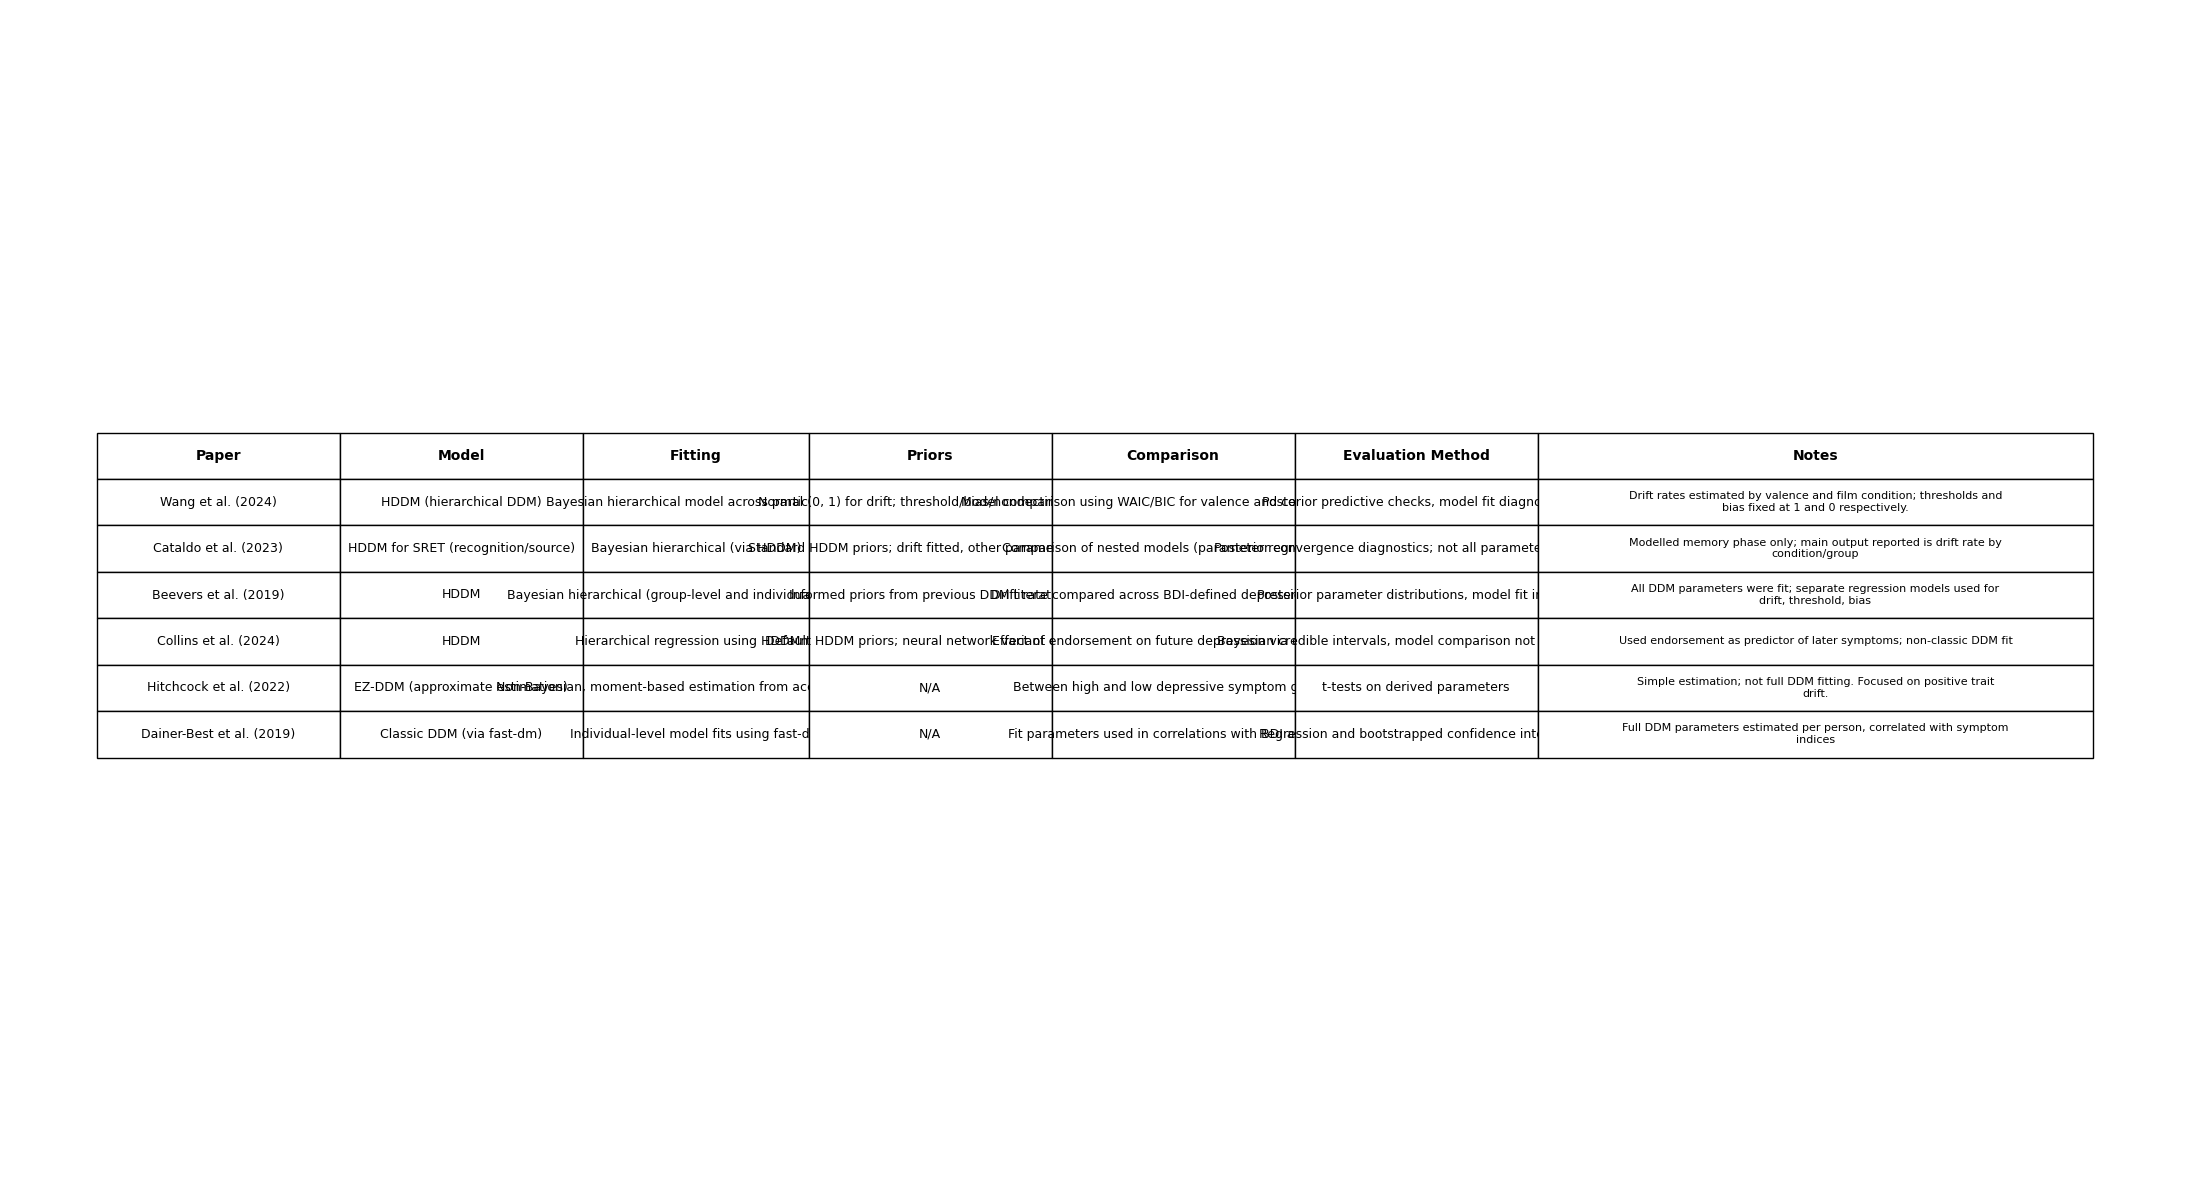

In [ ]:
method_data = [
    {"Paper": "Wang et al. (2024)",
     "Model": "HDDM (hierarchical DDM)",
     "Fitting": "Bayesian hierarchical model across participants",
     "Priors": "Normal (0, 1) for drift; threshold/bias/nondectime fixed",
     "Comparison": "Model comparison using WAIC/BIC for valence and condition effects",
     "Evaluation Method": "Posterior predictive checks, model fit diagnostics",
     "Notes": "Drift rates estimated by valence and film condition; thresholds and bias fixed at 1 and 0 respectively."
    },
    
    {
    "Paper": "Cataldo et al. (2023)",
    "Model": "HDDM (Recognition/Source Memory only)",
    "Fitting": "Bayesian hierarchical (via HDDM)",
    "Priors": "Standard HDDM priors; drift rate (v) varied by valence and condition; a, z, t₀ fixed",
    "Comparison": "Comparison of nested models (drift vs. drift+threshold etc.)",
    "Evaluation Method": "Posterior predictive checks; HDIs; convergence via R-hat",
    "Notes": "HDDM was applied only to recognition and source memory phases, not to the SRET task"
    },
    
    {"Paper": "Beevers et al. (2019)",
     "Model": "HDDM",
     "Fitting": "Bayesian hierarchical (group-level and individual estimates)",
     "Priors": "Informed priors from previous DDM literature",
     "Comparison": "Drift rate compared across BDI-defined depression groups",
     "Evaluation Method": "Posterior parameter distributions, model fit indices",
     "Notes": "All DDM parameters were fit; separate regression models used for drift, threshold, bias"
    },

    {"Paper": "Collins et al. (2024)",
     "Model": "HDDM",
     "Fitting": "Hierarchical regression using HDDMnn",
     "Priors": "Default HDDM priors; neural network variant of DDM",
     "Comparison": "Effect of endorsement on future depression via drift rates",
     "Evaluation Method": "Bayesian credible intervals, model comparison not emphasized",
     "Notes": "Used endorsement as predictor of later symptoms; non-classic DDM fit"
    },

    {"Paper": "Hitchcock et al. (2022)",
     "Model": "EZ-DDM (approximate estimation)",
     "Fitting": "Non-Bayesian, moment-based estimation from accuracy and RT",
     "Priors": "N/A",
     "Comparison": "Between high and low depressive symptom groups",
     "Evaluation Method": "t-tests on derived parameters",
     "Notes": "Simple estimation; not full DDM fitting. Focused on positive trait drift."
    },

    {"Paper": "Dainer-Best et al. (2019)",
     "Model": "Classic DDM (via fast-dm)",
     "Fitting": "Individual-level model fits using fast-dm",
     "Priors": "N/A",
     "Comparison": "Fit parameters used in correlations with BDI and RSE",
     "Evaluation Method": "Regression and bootstrapped confidence intervals",
     "Notes": "Full DDM parameters estimated per person, correlated with symptom indices"
    },

    {
    "Paper": "Tan et al. (2025)",
    "Model": "Drift Diffusion Model (FAST-dm)",
    "Fitting": "Per-participant fitting using 60-word trial set from Dataset A",
    "Priors": "Not explicitly specified",
    "Comparison": "Drift rates evaluated separately for positive and negative stimuli",
    "Evaluation method": "Kolmogorov-Smirnov estimation; MSE and R² in regression against QIDS scores",
    "Notes": "Drift rate used as predictor in multiple regressions; significance assessed against depressive symptoms"
    },

    {
    "Paper": "Tan et al. (2024)",
    "Model": "Drift Diffusion Model (DDM)",
    "Fitting": "Hierarchical Bayesian Estimation",
    "Priors": "Default weakly informative priors in HDDM",
    "Comparison": "Model variants were compared using Deviance Information Criterion (DIC)",
    "Evaluation method": "Posterior predictive checks; convergence assessed via trace plots and Gelman-Rubin R-hat",
    "Notes": "Only drift rate (v) was allowed to vary as a function of valence (positive/negative); threshold (a), bias (z), and non-decision time (Ter) were fixed across conditions."
    },

    {
    "Paper": "Castagna et al. (2023)",
    "Model": "Hierarchical DDM with Stimulus Coding",
    "Fitting": "Bayesian estimation via HDDM (20,000 samples, 5,000 burn-in, thinning applied)",
    "Priors": "Default priors in HDDM; not customized",
    "Comparison": "DIC used to compare 9 model variants",
    "Evaluation method": "Visual inspection of trace plots + Gelman-Rubin statistic (R̂ ≤ 1.1)",
    "Notes": "Best-fitting model allowed drift rate and bias to vary by valence; threshold and NDT were fixed. Parameters were condition-specific for positive and negative adjectives. Associations with social anxiety and depression were explored via regression."
    },

    {
        "Paper": "Myers et al. (2022)",
        "Model": "DDM-5 (standard DDM)",
        "Fitting": "Bayesian MCMC",
        "Priors": "Vague priors (e.g., drift ~ N(0, σ²), z ~ U(0,1), Ter ~ U(0.1–1.0))",
        "Comparison": "DDM-4 vs. DDM-5, based on LLE and BIC",
        "Evaluation method": "Posterior predictive checks, convergence via R̂ < 1.1",
        "Notes": "Demonstrates both individual and hierarchical model fitting; posterior distributions preferred over point estimates due to richer inference capabilities. Software: HDDM/DMC."
    },
    {
        "Paper": "Johnson et al. (2017)",
        "Model": "Hierarchical Bayesian DDM",
        "Fitting": "MCMC via JAGS with Wiener module",
        "Priors": "Non-informative priors for group-level parameters",
        "Comparison": "Model fit not directly compared, but posterior distributions used",
        "Evaluation method": "Posterior summaries, 95% HDI, convergence via trace plots",
        "Notes": "Code provided for hierarchical DDM with between/within manipulations. Designed for efficient parameter recovery in complex tasks with few trials."
    },
    {
        "Paper": "Frank et al. (2015)",
        "Model": "RL-DDM (Reinforcement Learning Drift Diffusion Model)",
        "Fitting": "Bayesian mixture model (5% of trials modeled as outliers)",
        "Priors": "Group-level parameters with non-informative priors",
        "Comparison": "Posterior predictive checks, not explicitly BIC/AIC",
        "Evaluation method": "RT and choice fit via quantile probability plots",
        "Notes": "Used RL to drive drift rate; included mixture modeling for attention lapses. Trial-level posterior predictive checks were emphasized."
    },
    {
        "Paper": "Voss et al. (2007)",
        "Model": "Standard DDM",
        "Fitting": "Simplex optimization in fast-dm",
        "Priors": "EZ-diffusion output used as starting point (not Bayesian)",
        "Comparison": "Optimization via product of KS test p-values across conditions",
        "Evaluation method": "CDF-based fitting, KS distance minimization",
        "Notes": "Non-Bayesian approach; fast-dm prioritizes computational speed. Uses inter-trial variability parameters sz, sv, st0."
    },

    {
        "Paper": "Duyser et al. (2025)",
        "Model": "Hierarchical Drift Diffusion Model (HDDM)",
        "Fitting": "Bayesian hierarchical estimation (group and individual levels)",
        "Priors": "Default priors in HDDM; not explicitly described in text",
        "Comparison": "Current Depression vs. Remitted Depression vs. Healthy Controls",
        "Evaluation Method": "Linear regression to link drift parameters to symptom severity; group comparisons for classification",
        "Notes": "Full HDDM used to decompose endorsement and recall task into cognitive components. Drift rates were central to linking memory bias to depressive state."
    }
]

# Wrap text for the Notes column
def wrap_text(text, width=75):
    return "\n".join(textwrap.wrap(str(text), width=width))

# Convert to DataFrame and wrap text
method_df = pd.DataFrame(method_data)
method_df["Notes"] = method_df["Notes"].apply(lambda x: wrap_text(x, 70))

# Column widths (adjusted for better readability)
col_widths = [0.14, 0.14, 0.13, 0.14, 0.14, 0.14, 0.32]

# Plot
fig, ax = plt.subplots(figsize=(22, 12))
ax.axis('off')

# Create table
table = tbl.table(ax, cellText=[method_df.columns.tolist()] + method_df.values.tolist(),
                  loc='center', cellLoc='center', colWidths=col_widths)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 2.2)

# Format table cells
for (row, col), cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')
    if row == 0:
        cell.set_fontsize(10)
        cell.set_text_props(weight='bold')
    elif col == 6:  # Notes
        cell.set_fontsize(8)
    else:
        cell.set_fontsize(9)

plt.tight_layout()
plt.show()